# Introduction 

In the following notebook, I will be exploring a cleaned version of the energy_dataset.csv file.

* Raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)
* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)

**Read in libraries for notebook**

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Set notebook preferences**

In [134]:
#Set preferences for pandas 
pd.set_option("display.max_rows", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')
font_title = {'fontsize' : 24, 
              'fontweight' : 'semibold',
             'fontname':'Gill Sans MT'}

#Surpress warnings
warnings.filterwarnings('ignore')

**Read in data**

In [123]:
#Set path to raw data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in raw data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0505_Cleaned_Energy_Dataset.csv', index_col='date_time')

# Data Overview

* time: Datetime index localized to CET
* total load forecast: forecasted electrical demand
* total load actual: actual electrical demand
* price day ahead: forecasted price EUR/MWh
* price actual: price in EUR/MWh
* **date**: mm/dd/yyyy
* **time**: time of recording
* **weekday**: day of recording
* **month**: month of recording
* **year**: year of recording

**Data Preview**

In [124]:
#Print df shape
print('Shape of data:', df.shape)

#View head and data info
display(df.head())

Shape of data: (35064, 9)


,total_load_forecast,total_load_actual,price_day_ahead,price_actual,date,time,weekday,month,year
date_time,,,,,,,,,
2015-01-01 00:00:00,26118.0,25385.0,50.10,65.41,2015-01-01,00:00:00,Thursday,January,2015
2015-01-01 01:00:00,24934.0,24382.0,48.10,64.92,2015-01-01,01:00:00,Thursday,January,2015
2015-01-01 02:00:00,23515.0,22734.0,47.33,64.48,2015-01-01,02:00:00,Thursday,January,2015
2015-01-01 03:00:00,22642.0,21286.0,42.27,59.32,2015-01-01,03:00:00,Thursday,January,2015
2015-01-01 04:00:00,21785.0,20264.0,38.41,56.04,2015-01-01,04:00:00,Thursday,January,2015


**About the Data**

In [125]:
print('Data set stats and info:\n{}\n'.format(df.describe()))
print(df.info())

Data set stats and info:
       total_load_forecast  total_load_actual  price_day_ahead  price_actual  \
count         35064.000000       35064.000000     35064.000000  35064.000000   
mean          28712.129962       28697.608573        49.874341     57.884023   
std            4594.100854        4575.872425        14.618900     14.204083   
min           18105.000000       18041.000000         2.060000      9.330000   
25%           24793.750000       24806.750000        41.490000     49.347500   
50%           28906.000000       28902.000000        50.520000     58.020000   
75%           32263.250000       32194.250000        60.530000     68.010000   
max           41390.000000       41015.000000       101.990000    116.800000   

               year  
count  35064.000000  
mean    2016.499658  
std        1.117744  
min     2015.000000  
25%     2016.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000  

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entr

**Target distributions**

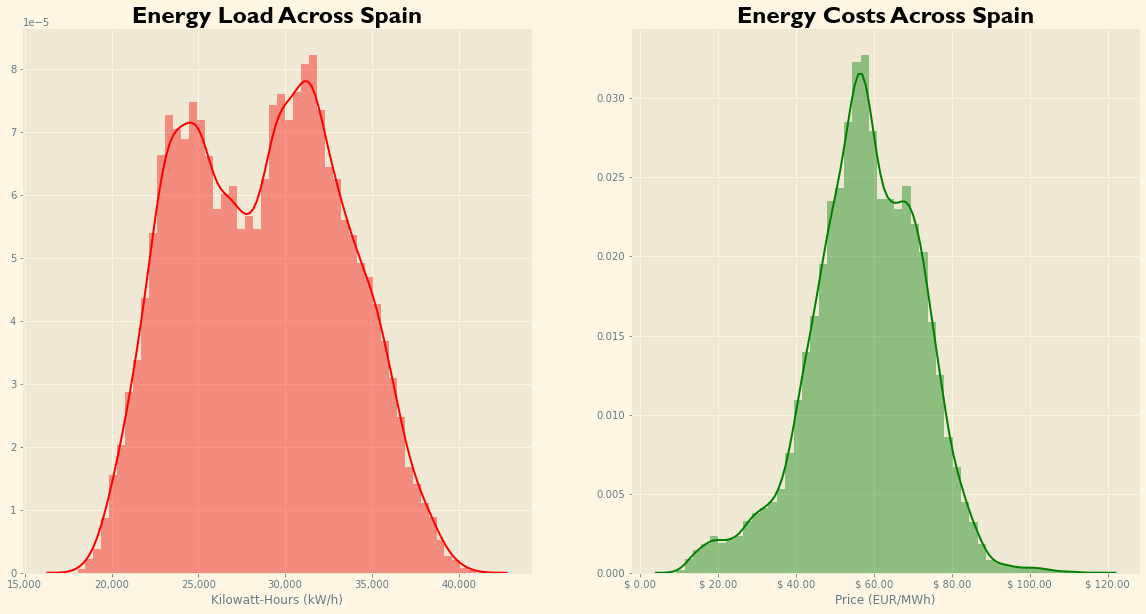

In [126]:
#Set plot
f, axes = plt.subplots(1,2, figsize = (20,10))

#Plot data
g = sns.distplot(df['total_load_actual'], ax = axes[0], color = 'r', bins=50)
j = sns.distplot(df['price_actual'], ax = axes[1],color = 'g', bins=50)

###Set plot aesthetics###
##plot 1##
#Title
g.set_title('Energy Load Across Spain',fontdict = font_title)

#Axes
g.set_xlabel('Kilowatt-Hours (kW/h)')
g.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

##plot 2##
#Title
j.set_title('Energy Costs Across Spain', fontdict = font_title)

#Axes
j.set_xlabel('Price (EUR/MWh)')
j.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "$ {:}.00".format(int(x))))

# Exploratory Data Analysis

## Total Energy Load

**Raw Time Plot**

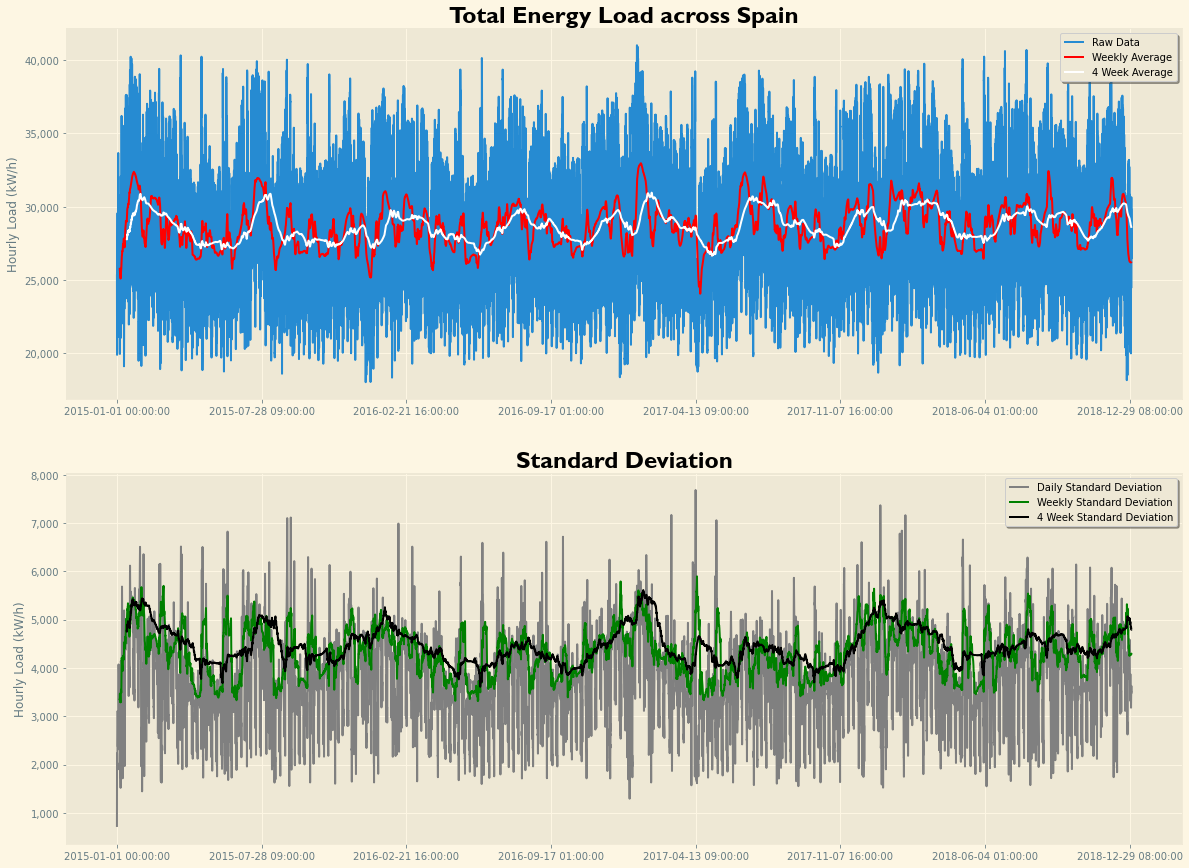

In [127]:
#Set figure
fig, ax = plt.subplots(2,1, figsize = (20,15))

#Plot data
df['total_load_actual'].plot(ax=ax[0], label = 'Raw Data', )
df['total_load_actual'].rolling(24*7,24*4).mean().plot(ax=ax[0],color = 'r',label = 'Weekly Average')
df['total_load_actual'].rolling(24*7*4,24*7*2).mean().plot(ax=ax[0],color = 'white',label = '4 Week Average')

df['total_load_actual'].rolling(24,1).std().plot(ax=ax[1],color = 'grey', label = 'Daily Standard Deviation', )
df['total_load_actual'].rolling(24*7,24*4).std().plot(ax=ax[1],color = 'g',label = 'Weekly Standard Deviation')
df['total_load_actual'].rolling(24*7*4,24*7*2).std().plot(ax=ax[1],color = 'black',label = '4 Week Standard Deviation')


###Set plot aesthetics###
##Plot 1##
#Title
ax[0].set_title('Total Energy Load across Spain',fontdict = font_title)

#Axes
ax[0].set_xlabel('')
ax[0].set_ylabel('Hourly Load (kW/h)')
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#Legend
ax[0].legend(fancybox = True, shadow = True, frameon = True)


##Plot 2##
#Title
ax[1].set_title('Standard Deviation', fontdict=font_title)

#Axes
ax[1].set_xlabel('')
ax[1].set_ylabel('Hourly Load (kW/h)')
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#Legend
ax[1].legend(fancybox = True, shadow = True, frameon = True)


**Check for Stationarity: Implement Augmented Dickey-Fuller and KPSS Test**

In [135]:
#Import tests
from statsmodels.tsa.stattools import adfuller, kpss

#Implement adfuller
adf_results = adfuller(df.total_load_actual)

#Implement adfuller
kpss_results = kpss(df.total_load_actual)

#Print adf_results
print("ADF Statistic: {}".format(adf_results[0]))
print("P-Value: {}".format(adf_results[1]))
for k,v in adf_results[4].items():
    print("Critical value {}: {}".format(k,v))

#Print kpss_results
print("\n===========================================\n")
print("KPSS Statistic: {}".format(kpss_results[0]))
print("P-Value: {}".format(kpss_results[1]))
for k,v in kpss_results[3].items():
    print("Critical value {}: {}".format(k,v))

ADF Statistic: -21.44158073935123
P-Value: 0.0
Critical value 1%: -3.43053679213716
Critical value 5%: -2.8616225575095284
Critical value 10%: -2.566813942767471


KPSS Statistic: 0.94135344614982
P-Value: 0.01
Critical value 10%: 0.347
Critical value 5%: 0.463
Critical value 2.5%: 0.574
Critical value 1%: 0.739


**Autocorrelation Plot**

Text(0.5, 1.0, 'Total Energy Load Autocorrelation')

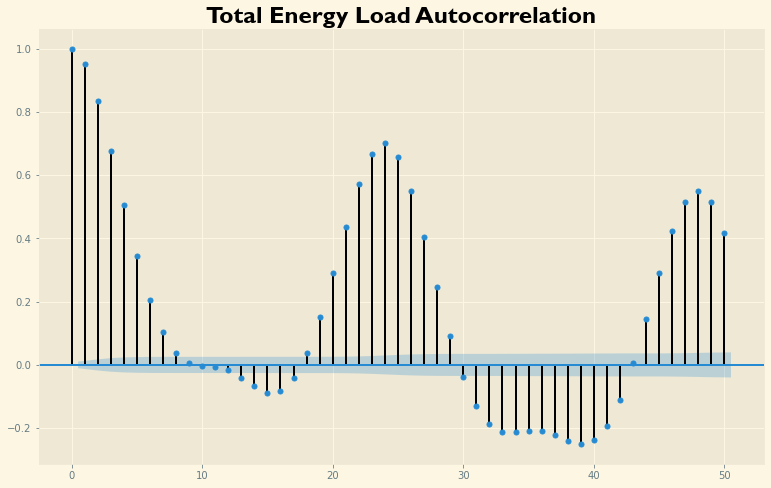

In [129]:
#Import plot acf
from statsmodels.graphics.tsaplots import plot_acf

#Set plot
f, ax = plt.subplots(figsize = (13,8))

#Fit to data
plot_acf(df['total_load_actual'], lags = 50, ax = ax),

###Set plot aesthetics###
#Title
ax.set_title('Total Energy Load Autocorrelation', fontdict = font_title)

**View lag at 24 hrs**

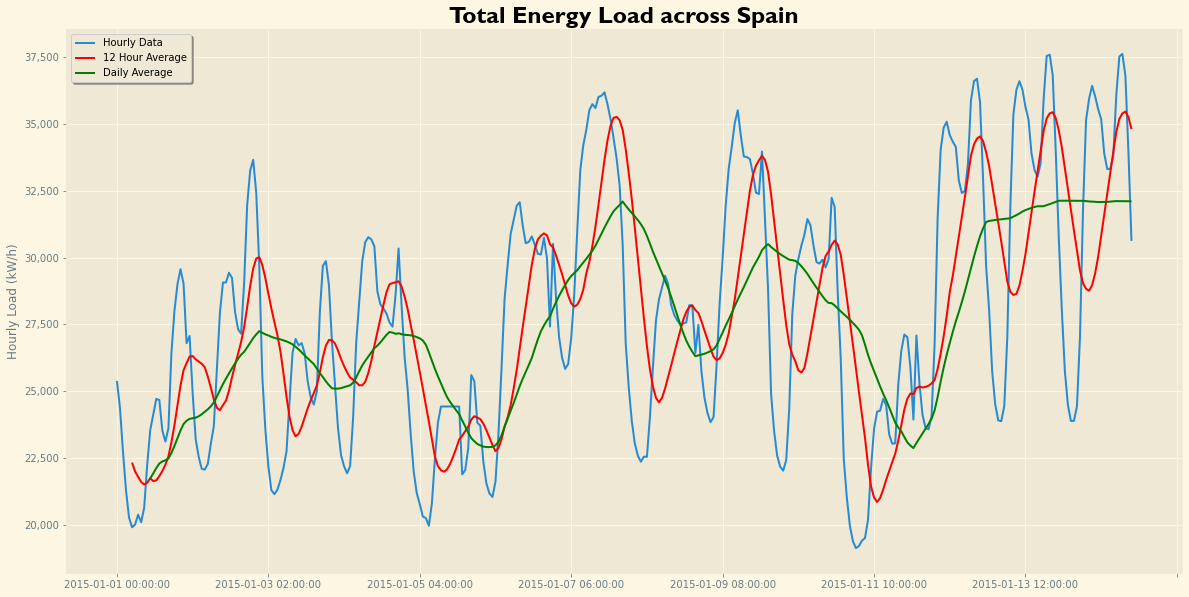

In [130]:
#Set plot
f, ax = plt.subplots(figsize = (20,10))

#Plot time plot of first 2 weeks to view seasonality
df['total_load_actual'][:24*7*2].plot(ax=ax, label = 'Hourly Data')
df['total_load_actual'][:24*7*2].rolling(12, 6).mean().plot(ax=ax, color = 'r', label ='12 Hour Average') #12 hours
df['total_load_actual'][:24*7*2].rolling(24, 12).mean().plot(ax=ax, color = 'g', label = 'Daily Average') #Daily

###Set plot aesthetics###
#Title
ax.set_title('Total Energy Load across Spain',fontdict = font_title)

#Axes
ax.set_xlabel('')
ax.set_ylabel('Hourly Load (kW/h)')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#Legend
ax.legend(fancybox = True, shadow = True, frameon = True);

**Check for yearly patterns**

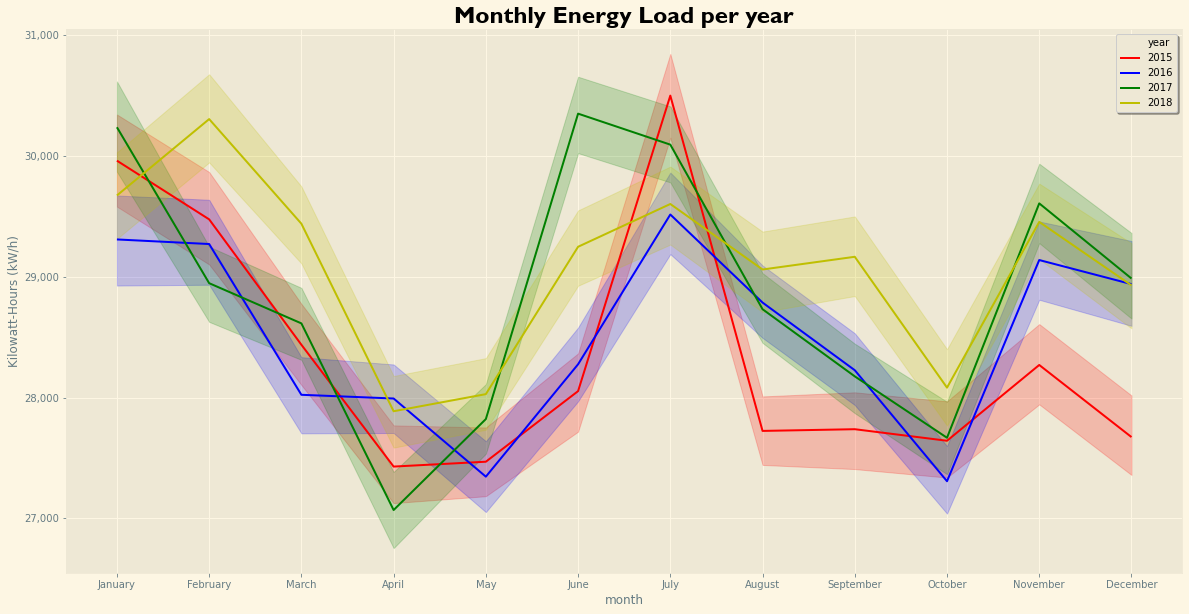

In [142]:
#Set plot
f, ax = plt.subplots(figsize = (20,10))

#Set colors for hue
colors = ['r','b','g','y']


#Plot Data
g = sns.lineplot(x = 'month', y = 'total_load_actual', hue = 'year',data = df, 
             sort = False, palette=colors, ax = ax);

###Set plot aesthetics###
#Title
g.set_title('Monthly Energy Load per year', fontdict = font_title)

#Axes
g.set_ylabel('Kilowatt-Hours (kW/h)')
g.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#Legend
g.legend(fancybox = True, shadow = True, frameon = True);

# Price 

**Raw data plot**

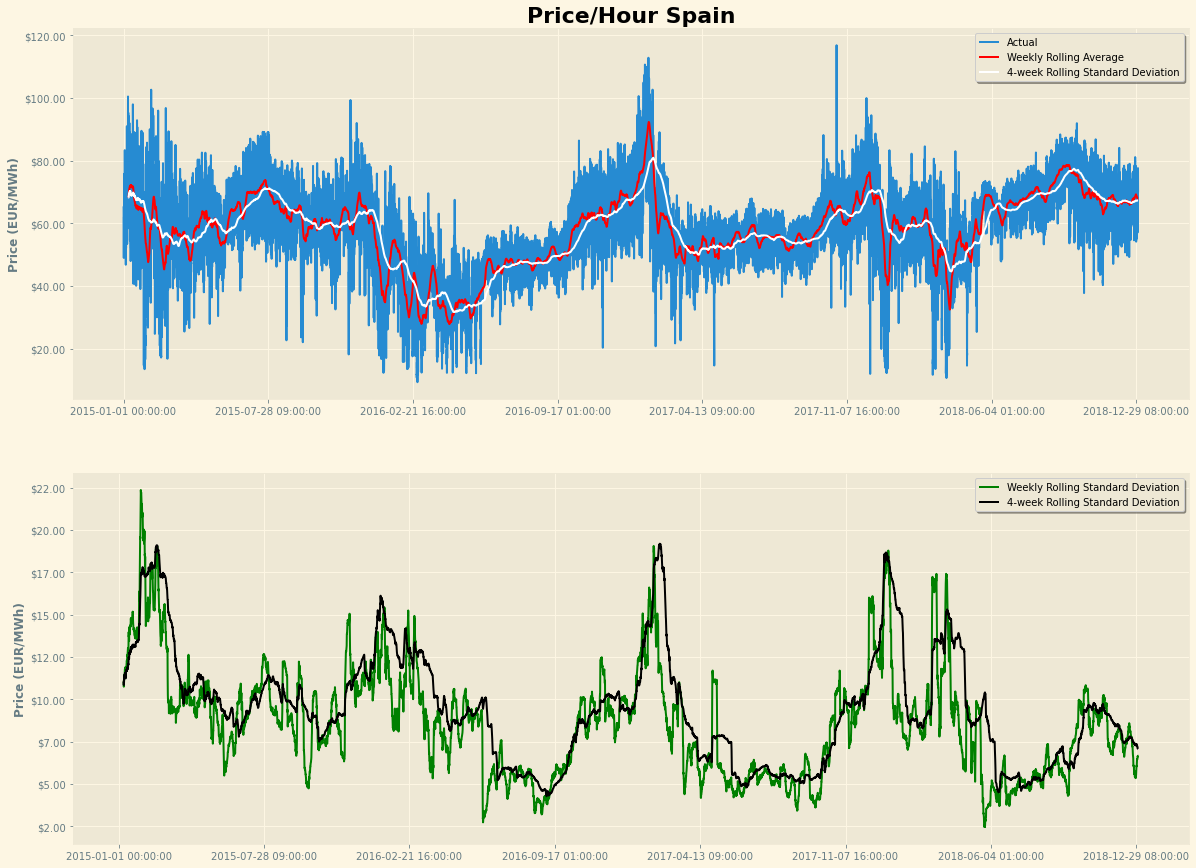

In [132]:
#Set figure
fig, ax = plt.subplots(2,1, figsize = (20,15))

#Plot Data
df['price_actual'].plot(ax =ax[0], label = 'Actual')
df['price_actual'].rolling(24*7,24*7).mean().plot(ax =ax[0],color = 'r', label = 'Weekly Rolling Average')
df['price_actual'].rolling(24*7*4,24*7).mean().plot(ax =ax[0], color = 'w', label = '4-week Rolling Standard Deviation')

df['price_actual'].rolling(24*7,24*7).std().plot(ax =ax[1], color = 'g', label = 'Weekly Rolling Standard Deviation')
df['price_actual'].rolling(24*7*4,24*7).std().plot(ax =ax[1], color = 'black', label = '4-week Rolling Standard Deviation')

###Set plot aesthetics###
##Plot 1##
#Title
ax[0].set_title('Price/Hour Spain',fontsize = 22, fontweight = 'bold')

#Axes
ax[0].set_xlabel('')
ax[0].set_ylabel('Price (EUR/MWh)', fontweight = 'bold')
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}.00".format(int(x))))

#Legend
ax[0].legend(fancybox = True, shadow = True, frameon = True)

##Plot 2##
#Title
ax[1].set_title('')

#Axes
ax[1].set_xlabel('')
ax[1].set_ylabel('Price (EUR/MWh)', fontweight = 'bold')
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}.00".format(int(x))))

#Legend
ax[1].legend(fancybox = True, shadow = True, frameon = True);

**Check for Stationarity: Implement Augmented Dickey-Fuller and KPSS Test**

In [133]:
#Implement adfuller
adf_results = adfuller(df.price_actual)

#Implement kpss
kpss_results = kpss(df.price_actual)

#Print adf_results
print('ADF Statistic: {}'.format(adf_results[0]))
print('P-Value: {}'.format(adf_results[1]))
for k,v in adf_results[4].items():
    print('Critical Values {}: {}'.format(k,v))
    
#Print kpss_results
print('\n=========================================\n')
print('KPSS Statistic: {}'.format(kpss_results[0]))
print('P-Value: {}'.format(kpss_results[1]))
for k,v in kpss_results[3].items():
    print('Critical Values {}: {}'.format(k,v))

ADF Statistic: -9.147016232851197
P-Value: 2.7504934849341313e-15
Critical Values 1%: -3.4305367814665044
Critical Values 5%: -2.8616225527935106
Critical Values 10%: -2.566813940257257


KPSS Statistic: 7.957006763926927
P-Value: 0.01
Critical Values 10%: 0.347
Critical Values 5%: 0.463
Critical Values 2.5%: 0.574
Critical Values 1%: 0.739


C:\Users\kishe\Miniconda3\envs\EDA\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\kishe\Miniconda3\envs\EDA\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


**Autocorrelation Plot**

Text(0.5, 1.0, 'Price Autocorrelation')

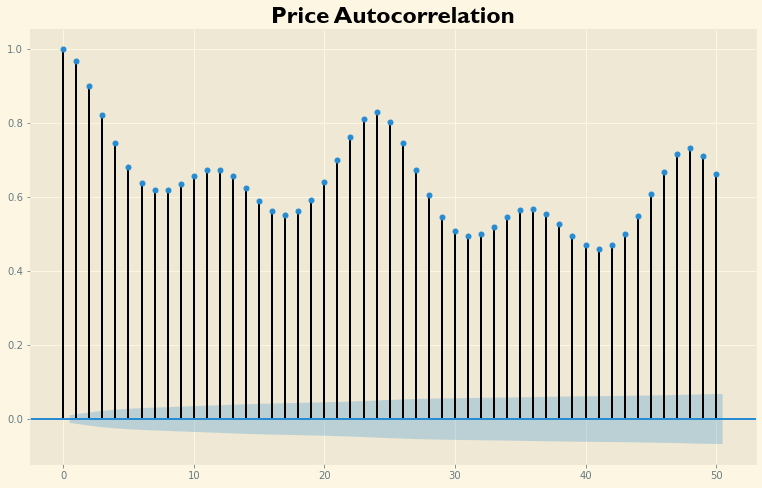

In [136]:
#Import plot acf
from statsmodels.graphics.tsaplots import plot_acf

#Set plot
f, ax = plt.subplots(figsize = (13,8))

#Fit to data
plot_acf(df['price_actual'], lags = 50, ax = ax),

###Set plot aesthetics###
#Title
ax.set_title('Price Autocorrelation', fontdict = font_title)

**View lag at 24 hrs**

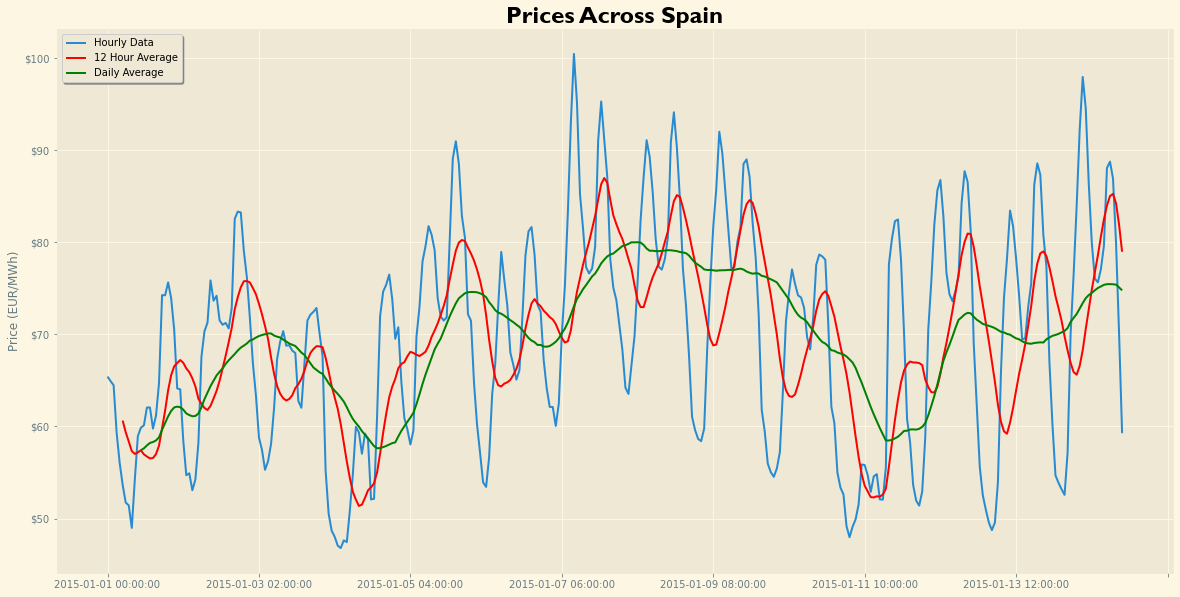

In [141]:
#Set plot
f, ax = plt.subplots(figsize = (20,10))

#Plot time plot of first 2 weeks to view seasonality
df['price_actual'][:24*7*2].plot(ax=ax, label = 'Hourly Data')
df['price_actual'][:24*7*2].rolling(12, 6).mean().plot(ax=ax, color = 'r', label ='12 Hour Average') #12 hours
df['price_actual'][:24*7*2].rolling(24, 12).mean().plot(ax=ax, color = 'g', label = 'Daily Average') #Daily

###Set plot aesthetics###
#Title
ax.set_title('Prices Across Spain',fontdict = font_title)

#Axes
ax.set_xlabel('')
ax.set_ylabel('Price (EUR/MWh)')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}".format(int(x))))

#Legend
ax.legend(fancybox = True, shadow = True, frameon = True);

**Check for yearly patterns**

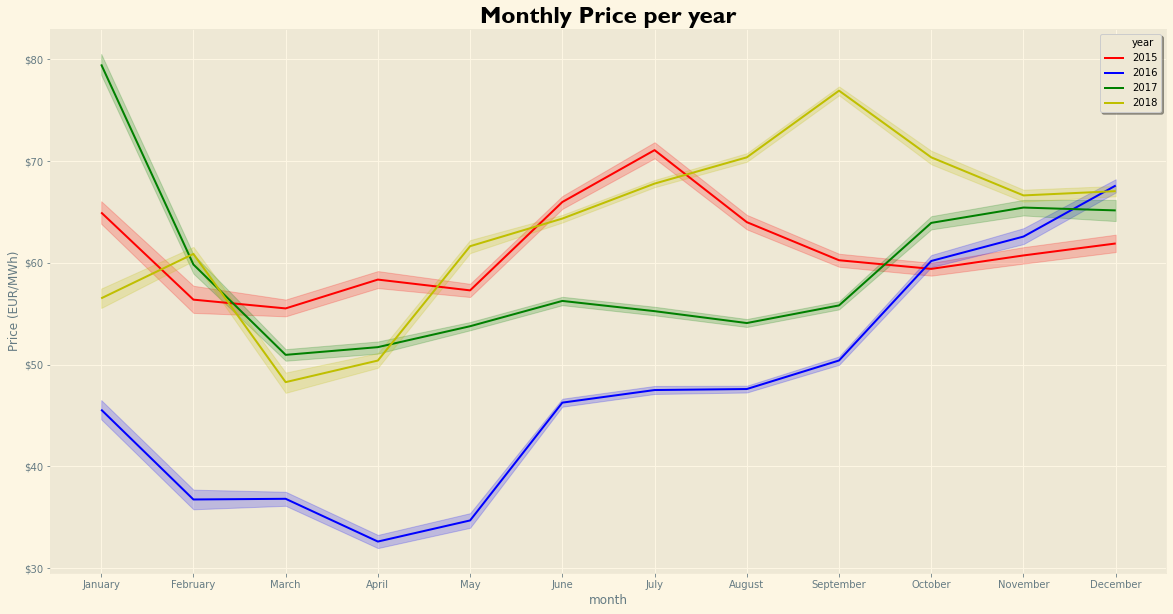

In [139]:
#Set plot
f, ax = plt.subplots(figsize = (20,10))

#Set colors for hue
colors = ['r','b','g','y']


#Plot Data
g = sns.lineplot(x = 'month', y = 'price_actual', hue = 'year',data = df, 
             sort = False, palette=colors, ax = ax);

###Set plot aesthetics###
#Title
g.set_title('Monthly Price per year', fontdict = font_title)

#Axes
g.set_ylabel('Price (EUR/MWh)')
g.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}".format(int(x))))

#Legend
g.legend(fancybox = True, shadow = True, frameon = True);